In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



d:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# step 1: download dataset

#download dataset from kaggle

In [2]:
train_df = pd.read_csv('C:/Users/howardwoo/Desktop/springboard/capstone two/lecture02/house price/input/train.csv',index_col = 0)
test_df = pd.read_csv('C:/Users/howardwoo/Desktop/springboard/capstone two/lecture02/house price/input/test.csv',index_col = 0)

In [3]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# step 2: merge dataset

#we want to transform the data to log from as the log() will normalized the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4FA2118C8>,
      dtype=object)

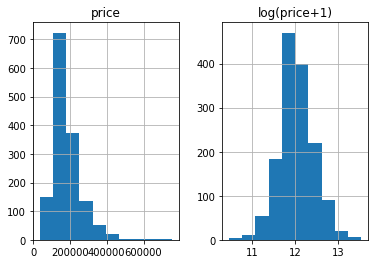

In [4]:
%matplotlib inline
prices = pd.DataFrame({"price":train_df["SalePrice"], "log(price+1)":np.log1p(train_df["SalePrice"])})
prices.hist()

In [5]:
y_train = np.log1p(train_df.pop('SalePrice'))

In [6]:
all_df = pd.concat((train_df, test_df), axis = 0) #merge all dataset and for further operations

In [7]:
all_df.shape

(2919, 79)

In [8]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

# step 3: feature engineering and data wrangling 

In [9]:
#take the "MSSubClass" as example, this feature should be a category variable, we need transfer this varialbe into a numerical variable

In [10]:
all_df['MSSubClass'].dtypes

dtype('int64')

In [11]:
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str) #change the type to string

In [12]:
all_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [13]:
# create dummy features for categorical variables

In [14]:
pd.get_dummies(all_df['MSSubClass'], prefix = 'MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [15]:
#extend this method to all categorical variables 

all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
# deal with all missing numerical variables

In [17]:
all_dummy_df.isnull().sum().sort_values(ascending = False).head(10)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
BsmtUnfSF         1
GarageArea        1
TotalBsmtSF       1
GarageCars        1
BsmtFinSF2        1
dtype: int64

In [18]:
# we use mean value to fill those missing values

In [19]:
mean_cols = all_dummy_df.mean()
mean_cols.head(10)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
dtype: float64

In [20]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [21]:
#check if there is any null
all_dummy_df.isnull().sum().sum()

0

## standardize the magnitude of numeric features data

In [22]:
numeric_cols = all_df.columns[all_df.dtypes != 'object' ]
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [23]:
numeric_col_means = all_dummy_df.loc[:,numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()
all_dummy_df.loc[:,numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

# step 4: construct a model and model selection 

In [64]:

dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [65]:
dummy_train_df.shape, dummy_test_df.shape

((1460, 303), (1459, 303))

In [66]:
# make the Data Frame to numpy array to fit for the sciki learn package
X_train = dummy_train_df.values
X_test = dummy_test_df.values

## model1: Ridge Regression 

In [27]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


In [28]:
alphas = np.logspace(-3,2,50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train, cv= 10, scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [29]:
for test_score in zip(test_scores):
    print(test_score)

(0.15324561839003664,)
(0.15321659011587035,)
(0.15318247486699818,)
(0.15314054463168902,)
(0.1530881214440197,)
(0.15302264371778423,)
(0.15294165779613308,)
(0.15284274797611827,)
(0.15272341900373404,)
(0.15258094800335886,)
(0.1524122317946971,)
(0.1522136673231057,)
(0.15198110993610725,)
(0.15170995056107534,)
(0.15139533822854023,)
(0.15103255217726247,)
(0.15061749914437814,)
(0.15014727399056962,)
(0.14962067690256795,)
(0.1490385436157597,)
(0.1484037479630363,)
(0.14772081094403489,)
(0.14699520088553106,)
(0.14623258268763456,)
(0.14543836722419579,)
(0.14461782776948315,)
(0.14377678461886398,)
(0.14292254095659987,)
(0.14206457835916003,)
(0.14121461063621224,)
(0.1403858986107404,)
(0.1395920563349715,)
(0.13884574605016103,)
(0.13815761473374177,)
(0.1375356634813172,)
(0.13698509308138568,)
(0.13650859060525367,)
(0.13610697963662793,)
(0.135780102296366,)
(0.13552773599710283,)
(0.13535031944858827,)
(0.13524931203692245,)
(0.1352271323618694,)
(0.13528676507183715,)

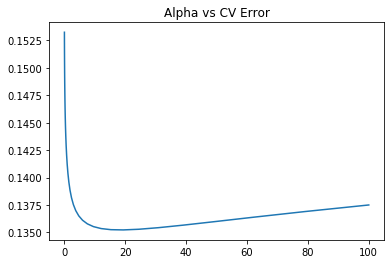

In [30]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");

## model2: Random Forest

In [31]:
#use Random Forest
from sklearn.ensemble import RandomForestRegressor 
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [32]:
for test_score in zip(test_scores):
    print(test_score)

(0.14155214797060345,)
(0.13808810790747178,)
(0.1389862023436888,)
(0.1398739387141661,)
(0.14170704030666334,)
(0.1421290925180065,)


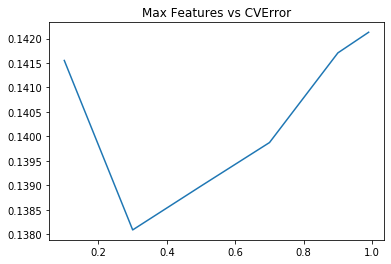

In [33]:
plt.plot(max_features, test_scores)
plt.title("Max Features vs CVError");

## model3 :Bagging model 

from here, we want to do a little bit ensemble based on the first two models, as we know from the ridge regression, 
the best alpha is 15,so we want to compared the error based on bagging model (with base_estimator = decision tree), and 
bagging model(with base_estimator = ridge regression )

In [34]:
from sklearn.ensemble import BaggingRegressor

#bagging model (with base_estimator = decision tree)

In [35]:
params = [1, 10, 15, 20, 25, 30, 40,50,60,70,80,90,100]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators = param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [36]:
for test_score in zip(test_scores):
    print(test_score)

(0.20923399944074297,)
(0.14971501934618497,)
(0.14531409123025912,)
(0.14467517712862205,)
(0.14368249088552107,)
(0.1430222661363801,)
(0.14195465518650674,)
(0.14268560820883663,)
(0.14222672947424195,)
(0.14021980878485168,)
(0.1415261066674908,)
(0.14110410387177086,)
(0.1414041508775704,)


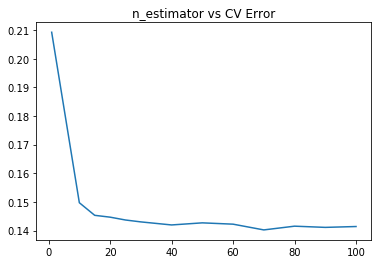

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title('n_estimator vs CV Error');

#bagging model (with base_estimator = ridge regression)

In [48]:
from sklearn.linear_model import Ridge
ridge = Ridge(15)

In [49]:
params = [1, 10, 15, 20, 25, 30, 40,50,60,70,80,90,100]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators = param, base_estimator = ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [50]:
for test_score in zip(test_scores):
    print(test_score)

(0.13886341310003514,)
(0.13328379986288003,)
(0.13306133814779064,)
(0.13581987948351962,)
(0.13325365555514468,)
(0.13383322298147915,)
(0.1337267325179269,)
(0.13365655658069092,)
(0.13257765864591572,)
(0.13401437744634231,)
(0.13388004855635444,)
(0.13370618253963723,)
(0.13311914377618722,)


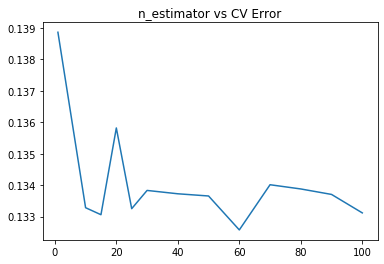

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

#we can see that if we use ridge regression as base estimator, we can reduces the test score to 0.1331

## model4: AdaBoost Regeressor

#as above, we compared the error based on adaboost model (with base_estimator = decision tree), and adaboost model(with base_estimator = ridge regression )

In [52]:
from sklearn.ensemble import AdaBoostRegressor 

In [53]:
params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [54]:
for test_score in zip(test_scores):
    print(test_score)

(0.15095778943213795,)
(0.14776851840304991,)
(0.14654266209358818,)
(0.14534302889244158,)
(0.14240610641980328,)
(0.14159496842348046,)
(0.14008319779986794,)
(0.14352385934046147,)
(0.14103332032871688,)


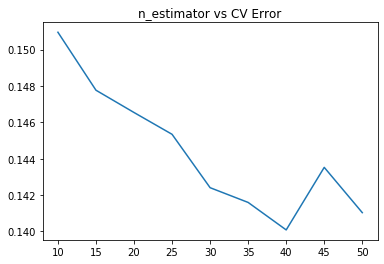

In [55]:
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

In [56]:
from sklearn.ensemble import AdaBoostRegressor 
ridge = Ridge(15)

In [57]:
params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores = []
for param in params:
    clf = AdaBoostRegressor(n_estimators = param, base_estimator = ridge)
    test_score = np.sqrt(-cross_val_score(clf,X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

not as good as the model3, so we stop to change the base_estimator to ridge when we use this model.

In [58]:
for test_score in zip(test_scores):
    print(test_score)

(0.15272553014109794,)
(0.15878785103980736,)
(0.1633072487558476,)
(0.1647012243040539,)
(0.1671877131041059,)
(0.17041618242192638,)
(0.16874278031053952,)
(0.17214420171003922,)
(0.16976775912590533,)


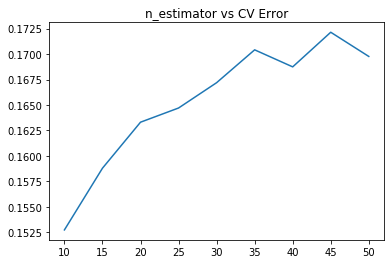

In [59]:
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

## model5: XGBoost

In [43]:
from xgboost import XGBRegressor

In [60]:
params = [1,2,3,4,5,6]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth = param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv= 10, scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [61]:
for test_score in zip(test_scores):
    print(test_score)

(0.13459832068707409,)
(0.1265446840190803,)
(0.12804415204924913,)
(0.13156237905288107,)
(0.1351825552685716,)
(0.13464007186376353,)


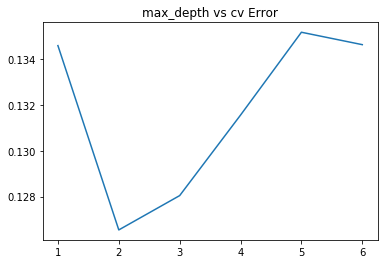

In [62]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.plot(params, test_scores)
plt.title('max_depth vs cv Error');

#now we decrease the error to 0.127 !
#we finally use this model. 

# step 5:use the final model 

In [68]:
XGB = XGBRegressor(max_depth = 2)
XGB.fit(X_train, y_train)

y_final = np.expm1(XGB.predict(X_test))

for sale_price in zip(y_final):
    print(sale_price)

(125922.414,)
(157918.7,)
(188508.02,)
(193684.17,)
(186918.7,)
(174454.44,)
(166986.28,)
(174164.03,)
(188346.11,)
(124115.19,)
(196475.14,)
(95769.35,)
(95769.625,)
(159699.02,)
(129946.17,)
(406105.8,)
(272165.34,)
(290336.2,)
(302401.88,)
(480538.84,)
(326005.2,)
(200967.64,)
(166204.28,)
(167470.47,)
(180966.27,)
(193609.19,)
(352403.62,)
(238833.66,)
(200499.38,)
(224183.1,)
(191055.8,)
(92920.68,)
(201139.81,)
(322524.97,)
(309844.28,)
(242552.19,)
(184314.1,)
(158285.39,)
(160684.84,)
(148934.88,)
(179038.5,)
(151419.84,)
(309620.7,)
(230083.5,)
(220342.56,)
(194938.9,)
(249904.4,)
(204462.1,)
(170951.0,)
(146156.33,)
(148701.4,)
(170958.5,)
(148204.61,)
(159578.58,)
(203833.05,)
(166788.28,)
(157216.94,)
(138180.03,)
(218148.8,)
(131490.98,)
(131336.33,)
(176461.89,)
(111388.63,)
(119334.305,)
(121952.75,)
(116639.74,)
(105335.14,)
(127865.91,)
(149776.97,)
(177604.55,)
(101949.31,)
(105607.625,)
(150923.19,)
(120304.1,)
(155455.4,)
(102487.72,)
(79218.2,)
(170509.9,)
(185200.

# step6: Summut the result

In [70]:
sumission_df = pd.DataFrame( data = {'Id': test_df.index, 'SalePrice': y_final} )

In [72]:
sumission_df.head(20)

,Id,SalePrice
0,1461,125922.414062
1,1462,157918.703125
2,1463,188508.015625
3,1464,193684.171875
4,1465,186918.703125
5,1466,174454.437500
6,1467,166986.281250
7,1468,174164.031250
8,1469,188346.109375
9,1470,124115.187500
